# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,grytviken,-54.2811,-36.5092,268.33,83,98,4.63,GS,1691429819
1,1,bredasdorp,-34.5322,20.0403,284.46,83,0,1.52,ZA,1691429819
2,2,yellowknife,62.4560,-114.3525,291.44,48,75,4.63,CA,1691429820
3,3,hamilton,39.1834,-84.5333,298.76,91,100,8.75,US,1691429820
4,4,patacamaya,-17.2333,-67.9167,288.00,20,5,3.14,BO,1691429820


### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_2671/1887293430.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_2671/1887293430.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)


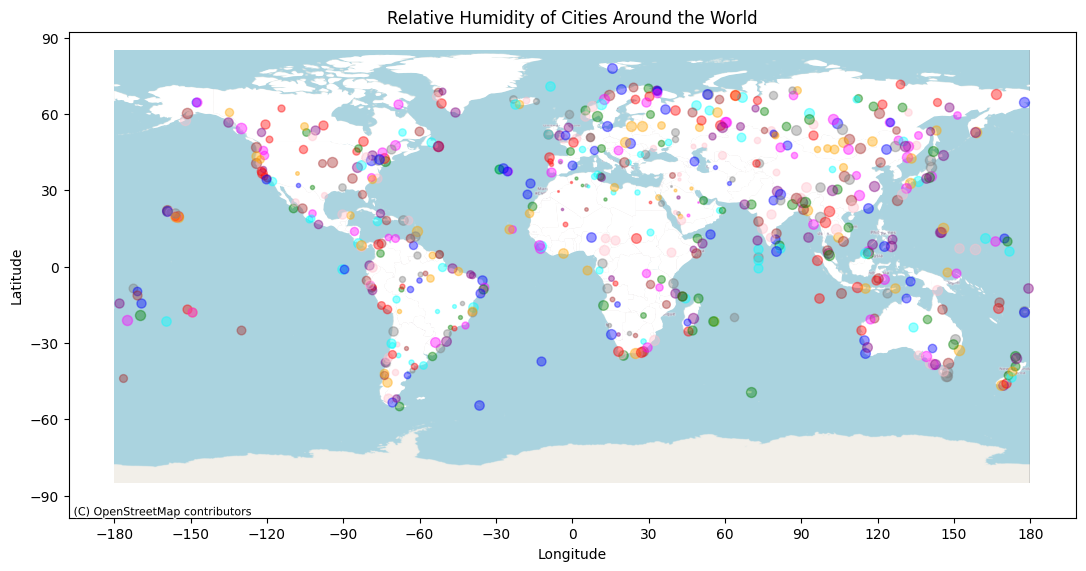

In [3]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the world map data without country borders and labels
world.boundary.plot(ax=ax, linewidth=0)  
world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)  

# Add latitude and longitude tickers to the axes
ax.set_xticks(range(-180, 181, 30))
ax.set_yticks(range(-90, 91, 30))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Relative Humidity of Cities Around the World')

# Add background from OpenStreetMap using contextily
ctx.add_basemap(ax, crs=world.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Normalize humidity values for dot size
max_humidity = city_data_df['Humidity'].max()
min_humidity = city_data_df['Humidity'].min()
city_ct = city_data_df['City'].nunique()
city_data_df['Humidity'] = 1 + 55 * (city_data_df['Humidity'] - min_humidity) / (max_humidity - min_humidity)  # Normalize to [1, 61]

# Define a list of colors for each city (you can customize this list)
city_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the city data as scatter points with different colors for each city
for idx, row in city_data_df.iterrows():
    color = city_colors[idx % len(city_colors)]  # Cycle through the colors list
    ax.scatter(row['Lng'], row['Lat'], s=row['Humidity'], c=color, label=row['City'], alpha=.4)

# Display the plot
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# 60 - 80 degrees F  =  288.7 & 299.8 kelvin
# Humidity between 55 - 75 %
# Wind Speed < 10mph

ideal_cities_df = city_data_df[(city_data_df['Max Temp'] >= 290) & (city_data_df['Max Temp'] < 300)]
ideal_cities_df = ideal_cities_df[(ideal_cities_df['Humidity'] >= 50) & (ideal_cities_df['Humidity'] < 75)]
ideal_cities_df = ideal_cities_df[ideal_cities_df['Wind Speed'] < 10]

# Drop any rows with null values
ideal_cities_df.dropna()

# Display sample data
ideal_cities_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,3,hamilton,39.1834,-84.5333,298.76,50.734043,100,8.75,US,1691429820
50,50,jamestown,42.0970,-79.2353,294.92,53.659574,100,7.20,US,1691429821
51,51,bethel,41.3712,-73.4140,298.37,50.148936,100,1.54,US,1691429842
56,56,port elizabeth,-33.9180,25.5701,290.98,52.489362,20,5.14,ZA,1691429642
63,63,darchula,29.8412,80.5287,297.51,53.659574,82,0.46,NP,1691429847
79,79,bonthe,7.5264,-12.5050,297.84,50.148936,100,3.56,SL,1691429854
83,83,cabanglasan,8.1214,125.3275,293.76,54.244681,94,1.37,PH,1691429856
123,123,tura,25.5198,90.2201,297.12,54.829787,100,1.75,IN,1691429873
150,150,birendranagar,28.6019,81.6339,296.38,52.489362,77,1.03,NP,1691429885
155,155,bhola,22.6833,90.6500,299.86,50.148936,100,3.45,BD,1691429888


### Step 3: Create a new DataFrame called `hotel_df`.

In [14]:
hotel_df = ideal_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
3,hamilton,US,39.1834,-84.5333,50.734043,
50,jamestown,US,42.0970,-79.2353,53.659574,
51,bethel,US,41.3712,-73.4140,50.148936,
56,port elizabeth,ZA,-33.9180,25.5701,52.489362,
63,darchula,NP,29.8412,80.5287,53.659574,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [42]:
from urllib.parse import urlencode

# Set parameters to search for a hotel
radius = 10000
params = {
    'apiKey': '1e456b574bbf4a93a7fc898a164cc378',
    'categories': 'accommodation.hotel',
    'limit': 1
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    lat = row['Lat']
    lng = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
   # params["bias"] = f'proximity:{lng},{lat}'
    params["filter"] = f'circle:{lng},{lat},{radius}'

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Build request URL
    url = f"{base_url}?{urlencode(params)}"

    # Make and API request using the params dictionaty
    name_address = requests.get(url)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    

    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.head()


Starting hotel search
hamilton - nearest hotel: Homewood Suites
jamestown - nearest hotel: Chautauqua Harbor Hotel
bethel - nearest hotel: Hotel Zero Degrees
port elizabeth - nearest hotel: Garden Court Kings Beach
darchula - nearest hotel: बिस्ट होटल
bonthe - nearest hotel: No hotel found
cabanglasan - nearest hotel: No hotel found
tura - nearest hotel: No hotel found
birendranagar - nearest hotel: Mansarowar Hotel
bhola - nearest hotel: Hotel Papillon
moyamba - nearest hotel: Samies
yigo village - nearest hotel: Hotel Nikko Guam
hawaiian paradise park - nearest hotel: No hotel found
shingu - nearest hotel: 新宮セントラルポテンシャル
fortuna - nearest hotel: Comfort Inn & Suites Redwood Country
sukumo - nearest hotel: まなべ旅館
kamiiso - nearest hotel: ホテル法華クラブ函館
ocean shores - nearest hotel: Lighthouse Suites Inn
daru - nearest hotel: New Century
katsuura - nearest hotel: 旅館松の家
st. john's - nearest hotel: DoubleTree
tibati - nearest hotel: Hôtel Calypso Annexe
loikaw - nearest hotel: Loikaw Lodge
yut

,City,Country,Lat,Lng,Humidity,HotelName,Hotel Name
3,hamilton,US,39.1834,-84.5333,50.734043,,Homewood Suites
50,jamestown,US,42.0970,-79.2353,53.659574,,Chautauqua Harbor Hotel
51,bethel,US,41.3712,-73.4140,50.148936,,Hotel Zero Degrees
56,port elizabeth,ZA,-33.9180,25.5701,52.489362,,Garden Court Kings Beach
63,darchula,NP,29.8412,80.5287,53.659574,,बिस्ट होटल


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [43]:
import geopandas as gpd
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.tile_providers import get_provider, Vendors
from bokeh.io import output_notebook

# Load world map data from GeoPandas
world.boundary.plot(ax=ax, linewidth=0)  
world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)  

# Load city data (replace this with your actual city data)
city_data_df = hotel_df

city_data_df.rename(columns={'Max Temp': 'MaxTemp', 'Hotel Name': 'HotelName'}, inplace=True)

# Create a Bokeh plot for the scatter plot
p = figure(title="World Map with Scatter Plot and Hover Tooltip", tools="pan,box_zoom")

# Get the CartoDB Positron Retina tile provider
tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)
p.add_tile(tile_provider)

# Add scatter plot glyphs
scatter = p.circle('Lng', 'Lat', size=10, color='blue', source=city_data_df, fill_alpha=0.6)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("City", "@City"), ("Country", "@Country"), ("Lat", "@Lat"), ("Lng", "@Lng"),
                ("Humidity", "@Humidity"), ("Hotel Name", "@HotelName")]
p.add_tools(hover)

# Show the Bokeh plot
output_notebook()
show(p)






/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_2671/1993266536.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)


Loading BokehJS ...

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Generate random Earth coordinates
np.random.seed(42)
num_points = 5
data = {
    'Longitude': np.random.uniform(-180, 180, num_points),
    'Latitude': np.random.uniform(-90, 90, num_points)
}
df = pd.DataFrame(data)

# Create Bokeh plot
p = figure(title="Scatter Plot with Hover Tooltip")

# Add scatter plot glyphs
scatter = p.circle('Longitude', 'Latitude', size=10, color='purple', source=df)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Longitude", "@Longitude"), ("Latitude", "@Latitude")]
p.add_tools(hover)

# Customize x-axis and y-axis tick values
p.yaxis.ticker = [-90, -60, -30, 0, 30, 60, 90]
p.yaxis.major_label_overrides = {-90: '-90', -60: '-60', -30: '-30', 0: '0', 30: '30', 60: '60', 90: '90'}

p.xaxis.ticker = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
p.xaxis.major_label_overrides = {-180: '-180', -150: '-150', -120: '-120', -90: '-90', -60: '-60', -30: '-30', 0: '0', 30: '30', 60: '60', 90: '90', 120: '120', 150: '150', 180: '180'}

# Show the plot in a Jupyter Notebook
output_notebook()
show(p)

